In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import wcs, coordinates, table
from astropy import units as u
from astropy.io import fits

from ekfplot import plot as ek
from ekfplot import colors as ec
from agrias import photometry, utils
from carpenter import emission, conventions, pixels

from pieridae.starbursts import make_figures

In [3]:
catalog, masks = make_figures.load_sample ()

/home/kadofong/.conda/envs/merenv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Computed aperture correction in 0.0 seconds.
Computed line contamination correction in 0.0 seconds.
Loading precomputed Galactic extinction map...
Interpolated Galactic extinction values from map.


/home/kadofong/.conda/envs/merenv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kadofong/merian/carpenter/src/carpenter/emission.py:338: RuntimeWarning: divide by zero encountered in reciprocal
  emission_correction = correct_NIISII(redshift_values, aperture_corrected_logmass)**-1


Computed Galactic extinction correction in 0.8 seconds.
Computed internal extinction corrections in 0.8 seconds.


/home/kadofong/merian/agrias/python/agrias/photometry.py:115: RuntimeWarning: invalid value encountered in log10
  lsq_y = np.log10(np.array([ fdict[band] for band in plawbands ]))
/home/kadofong/.conda/envs/merenv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kadofong/.conda/envs/merenv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [96]:
tree_all = cKDTree(catalog.loc[masks['is_good'][0],['RA','DEC']].values)
dd_all, ii_all = tree_all.query(tree_all.data,5)
too_close = dd_all < rmin.to(u.deg).value
dd_all = np.where(too_close, np.nan, dd_all)
d2d_all = np.nanmin(dd_all, axis=1) * u.deg
d2d_all_phys = (d2d_all * cosmo.kpc_comoving_per_arcmin(0.08)).to(u.Mpc)

/tmp/ipykernel_656263/408172449.py:5: RuntimeWarning: All-NaN slice encountered
  d2d_all = np.nanmin(dd_all, axis=1) * u.deg


In [100]:
catalog.loc[masks['is_good'][0],['RA','DEC']].values.shape

(47346, 2)

In [99]:
d2d_all_phys.shape

(47346,)

In [61]:
from scipy.spatial import cKDTree

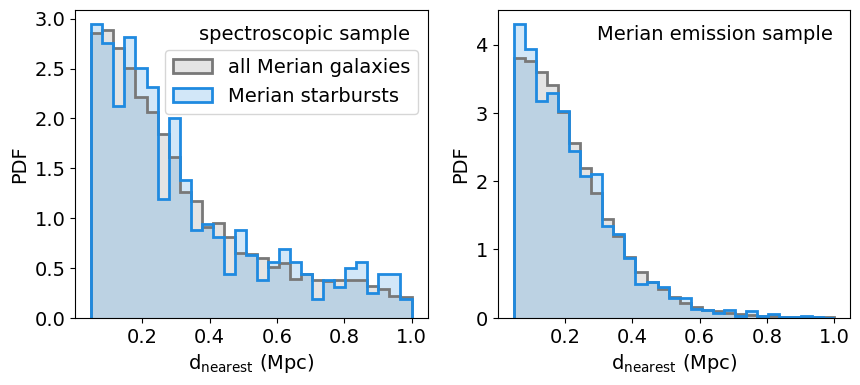

In [4]:
ii, d2d = make_figures.mk_pairdistance(catalog, masks)

In [6]:
starbursts = catalog.loc[masks['is_good'][0]&masks['is_starburst'][0]]
starbursts[['RA','DEC']].to_csv('../../pixel_excess/scripts/starbursts_v0.txt', index=False, header=False, sep=' ')


In [8]:
from carpenter import conventions

In [9]:
conventions.produce_merianobjectname(*catalog.loc['M3581703107945458272', ['RA','DEC']].values)

'J095618.67+030835.28'

In [ ]:
dd = coordinates.SkyCoord(catalog.loc[masks['in_band'][0]&masks['is_starburst'][0]].loc[d2d<(0.08*u.Mpc)]['RA']

In [138]:
catalog.loc[masks['in_band'][0]].iloc[ii[d2d<0.08*u.Mpc]][['RA','DEC','logmass']]

,RA,DEC,logmass
M2951036432392672360,36.178101,-6.140933,10.003358
M3036077059731388796,32.346042,-5.248200,8.937919
M3036336544475534540,34.607618,-5.657327,10.891598
M3036538854615050792,34.424784,-4.711248,7.673582
M3036644407731310373,36.432521,-5.797656,9.741295
...,...,...,...
M3582142912596576093,150.435122,3.514559,7.568595
M3582191291108186023,149.996679,3.628183,7.938236
M3582191291108186622,150.005955,3.626255,8.887099
M3582151708689619120,149.995761,3.625158,7.956151


In [142]:
d2d[d2d<(0.08*u.Mpc)].to(u.kpc)

<Quantity [23.09491858, 71.71830061, 47.60553494, 66.48119651, 61.20368573,
           32.07288608, 53.33203227, 70.26486482, 28.02505614, 28.02505614,
           59.10271746, 27.15493969, 72.55308785, 35.03186933, 73.1856784 ,
           61.2104102 , 33.25177659, 24.7394145 , 38.16592859, 39.86737399,
           46.2813235 , 26.5796957 , 65.7416558 , 61.05584193, 19.30343807,
           52.71016486, 62.46642181, 17.93987017, 23.81103683, 36.00090888,
           36.00090888, 23.97262679, 77.95462367, 31.7099167 , 18.31628562,
           77.2853397 , 27.69975985, 19.56049993, 39.14994909, 34.26753334,
           79.35209217, 79.35209217, 58.80510592, 61.32554963, 22.37346876,
           51.32913341, 50.99853941, 26.50776651, 32.79226561, 34.23448862,
           30.79426956, 30.79426956, 62.4872431 , 34.50355504, 36.28087926,
           48.42818959, 48.42818959, 32.19766235, 44.63601643, 44.63601643,
           44.77035371, 43.16184145, 20.22722833, 61.32071936, 45.3640446 ,
           4

In [139]:
catalog.loc[masks['in_band'][0]&masks['is_starburst'][0]].loc[d2d<(0.08*u.Mpc)][['RA','DEC','logmass']]

,RA,DEC,logmass
M2951036432392672367,36.174447,-6.142391,7.803500
M3036077059731389861,32.342229,-5.236594,10.091179
M3036336544475534543,34.612214,-5.664008,8.077918
M3036538854615052624,34.423264,-4.700026,7.532593
M3036644407731310408,36.422635,-5.794345,6.869787
...,...,...,...
M3582142912596575864,150.427807,3.512202,9.451441
M3582151708689619120,149.995761,3.625158,7.956151
M3582191291108186021,149.996519,3.626797,8.100401
M3582191291108186023,149.996679,3.628183,7.938236


,RA,DEC,tract_Merian,patch_Merian,N708_gaap1p0Flux_Merian,N708_gaap1p0FluxErr_Merian,N708_cModelFlux_Merian,N708_cModelFluxErr_Merian,N540_gaap1p0Flux_Merian,N540_gaap1p0FluxErr_Merian,...,haew,oiiiew,rmag,F_Ha_obs,L_Ha,L_OIII,n540_apercorr,i_apercorr,lineratio,pz
M2951036432392672367,36.174447,-6.142391,8283,65,9541.579741,92.583299,1.992966e+04,161.765817,4520.907605,69.777690,...,84.277953,-11.142769,21.203412,7.214901e-16,1.446103e+40,-2.647436e+39,2.056030,2.082594,-0.183074,0.971459
M3036077059731389861,32.342229,-5.236594,8522,42,278717.218002,274.261931,1.228076e+06,812.839843,151395.242830,97.601420,...,30.950607,NaN,16.714462,2.241054e-14,5.634139e+41,-6.585327e+39,3.670809,5.036227,-0.011688,1.033922
M3036336544475534543,34.612214,-5.664008,8523,20,14281.111007,70.136812,3.016810e+04,132.643927,11999.070592,46.143951,...,74.941780,39.429108,20.619917,1.022578e-15,1.765300e+40,1.517446e+40,2.097383,2.113064,0.859597,1.008890
M3036538854615052624,34.423264,-4.700026,8523,66,13401.615789,102.257883,1.653826e+04,100.571055,21403.183285,69.159187,...,198.761756,453.352495,21.657636,9.486066e-16,1.765296e+40,6.357005e+40,1.281100,1.004935,3.601099,1.599817
M3036644407731310408,36.422635,-5.794345,8524,9,77364.390737,89.313792,1.868094e+05,180.243386,50158.979049,70.324311,...,1.187728,-1.513312,18.395983,1.343095e-16,3.546051e+39,-6.115466e+39,2.404106,2.362881,-1.724585,0.313997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M3582142912596575864,150.427807,3.512202,10055,30,108240.914588,112.621229,4.205944e+05,327.939933,69667.885164,89.033014,...,43.702342,7.017499,17.495737,1.114476e-14,2.012297e+41,4.529696e+40,3.772358,4.836211,0.225101,0.943526
M3582151708689619120,149.995761,3.625158,10055,32,6393.095942,65.015963,1.537458e+04,144.261948,6602.132603,56.174250,...,100.690510,135.582242,21.490757,6.342505e-16,1.159085e+40,2.418562e+40,2.135604,2.189501,2.086614,1.481312
M3582191291108186021,149.996519,3.626797,10055,41,11714.952072,73.775740,3.374409e+04,173.866620,8734.372885,61.911379,...,106.442878,50.155569,20.835549,1.228044e-15,2.193705e+40,1.584429e+40,2.778483,2.341540,0.722262,0.885607
M3582191291108186023,149.996679,3.628183,10055,41,10440.128389,69.273287,2.732556e+04,160.296166,8074.750451,57.433440,...,81.630404,34.760556,20.818047,9.193121e-16,1.607312e+40,1.091194e+40,2.650842,2.479662,0.678893,0.928919


In [117]:
ii

array([[    0,     5,    14,     6,    15],
       [    1,    13,    14,    15,     5],
       [    2,    25,    45,    40,    46],
       ...,
       [47343, 47344, 47345, 47342, 47340],
       [47344, 47345, 47343, 47342, 47341],
       [47345, 47344, 47343, 47342, 47340]])

In [72]:
catcoords = coordinates.SkyCoord(catalog['RA'].values, catalog['DEC'].values, unit='deg')

In [133]:
idx, d2d,_ = catcoords.match_to_catalog_sky(catcoords[in_band], 2)
d2d_phys = (d2d * cosmo.kpc_comoving_per_arcmin(0.08)).to(u.Mpc)

(<Axes: >,
 (array([3.75519849, 1.58979206, 1.80907372, 1.17863894, 1.23345936,
         0.74007561, 0.43856333, 0.65784499, 0.38374291, 0.52079395,
         0.19187146, 0.3563327 , 0.30151229, 0.27410208, 0.13705104,
         0.10964083, 0.        , 0.21928166, 0.16446125, 0.02741021,
         0.05482042, 0.10964083, 0.08223062, 0.05482042, 0.02741021,
         0.02741021, 0.02741021, 0.        , 0.02741021]),
  array([0.        , 0.06896552, 0.13793103, 0.20689655, 0.27586207,
         0.34482759, 0.4137931 , 0.48275862, 0.55172414, 0.62068966,
         0.68965517, 0.75862069, 0.82758621, 0.89655172, 0.96551724,
         1.03448276, 1.10344828, 1.17241379, 1.24137931, 1.31034483,
         1.37931034, 1.44827586, 1.51724138, 1.5862069 , 1.65517241,
         1.72413793, 1.79310345, 1.86206897, 1.93103448, 2.        ]),
  [<matplotlib.patches.Polygon at 0x15428776fa60>]))

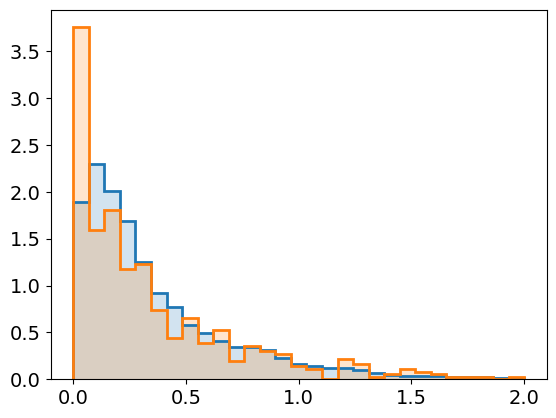

In [134]:
#conversion = cosmo.kpc_comoving_per_arcmin(catalog.loc[in_band, 'z_spec'].mean()).to(u.Mpc/u.deg)
conversion = cosmo.kpc_comoving_per_arcmin(0.08).to(u.Mpc/u.deg)
bins = np.linspace(0., 2.,30)
ek.hist(d2d_phys[in_band].value, density=True, lw=2, alpha=0.2, bins=bins)
ek.hist(d2d_phys[is_starburst&in_band].value, density=True, lw=2, alpha=0.2, bins=bins)
#plt.xscale('log')

array([1, 2])